In [4]:
from tensorflow.python.summary.summary_iterator import summary_iterator

it = summary_iterator("../runs/Jan01_15-45-00_DESKTOP-I8HN3PB_pvc1_shallownet/events.out.tfevents.1609533900.DESKTOP-I8HN3PB.3117.0")


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [21]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from tensorboard.plugins.hparams import plugin_data_pb2

si = summary_iterator(
    "../runs/Jan01_15-45-00_DESKTOP-I8HN3PB_pvc1_shallownet/1609533900.105029/events.out.tfevents.1609533900.DESKTOP-I8HN3PB.3117.1"
)

count = 0
for event in si:
    for value in event.summary.value:
        count += 1
        proto_bytes = value.metadata.plugin_data.content
        if len(proto_bytes) > 0:
            print('Found event!')
            
            plugin_data = plugin_data_pb2.HParamsPluginData.FromString(proto_bytes)
            print(plugin_data)
            if plugin_data.HasField("experiment"):
                print(
                    "Got experiment metadata with %d hparams and %d metrics"
                    % (
                        len(plugin_data.experiment.hparam_infos),
                        len(plugin_data.experiment.metric_infos),
                    ),
                )
            elif plugin_data.HasField("session_start_info"):
                print(
                    "Got session start info with concrete hparam values: %r"
                    % (dict(plugin_data.session_start_info.hparams),)
                )

Found event!
experiment {
  hparam_infos {
    name: "exp_name"
    type: DATA_TYPE_STRING
  }
  hparam_infos {
    name: "submodel"
    type: DATA_TYPE_STRING
  }
  hparam_infos {
    name: "learning_rate"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "num_epochs"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "image_size"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "batch_size"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "nfeats"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "num_blocks"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "warmup"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "single_cell"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "ckpt_frequency"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "no_sample"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "no_wandb"
    type: DATA_TYPE_FLOAT64
  }
  hparam_infos {
    name: "load_conv1_weights"

In [16]:
event

wall_time: 1609731694.9603016
step: 8719456
summary {
  value {
    tag: "Loss/train"
    simple_value: 1.7002460956573486
  }
}

In [5]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from tensorboard.plugins.hparams import plugin_data_pb2

si = summary_iterator(
    "../runs/Jan06_16-36-46_DESKTOP-I8HN3PBshallownet_symmetric_repeat/events.out.tfevents.1609969007.DESKTOP-I8HN3PB.11783.0"
)

count = 0
for event in si:
    for value in event.summary.value:
        if value.tag == 'Tune/corr/mean':
            print(value)

tag: "Tune/corr/mean"
simple_value: 0.03136223927140236

tag: "Tune/corr/mean"
simple_value: 0.06252089887857437

tag: "Tune/corr/mean"
simple_value: 0.08293627947568893



DataLossError: truncated record at 249067196' failed with Read less bytes than requested

In [7]:
import torch

filename = '../models/shallownet_symmetric_repeat/model.ckpt-1120000-2021-01-07 04-20-03.771753.pt'
data = torch.load(filename)

Text(0.5, 0, 'delay')

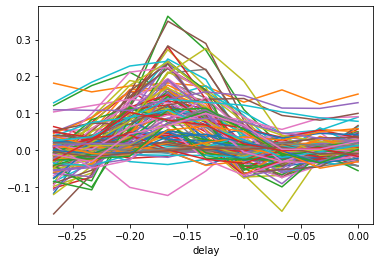

In [22]:
import matplotlib.pyplot as plt
import numpy as np
_ = plt.plot((np.arange(-8, 1)) / 30, data['wt'].cpu().detach().numpy())
plt.xlabel('delay')